## __Домашнее задание по теме «Временные ряды, общая теория»__

In [ ]:
import os

import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller

from scipy.stats import boxcox

import matplotlib.pyplot as plt
%matplotlib inline

### Подготовим инструменты для анализа ряда на стационарность.

In [ ]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [ ]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

### Загрузка данных

In [ ]:
folder = 'D:/Git_repos/tsml13_hw1_ts_introduction/data/Series'

file_names = os.listdir(folder)
file_names

['daily-total-female-births-in-cal.csv',
 'international-airline-passengers.csv',
 'mean-monthly-air-temperature-deg.csv',
 'monthly-boston-armed-robberies-j.csv',
 'monthly-sales-of-company-x-jan-6.csv',
 'weekly-closings-of-the-dowjones-.csv']

In [ ]:
paths = []
for i, filename in enumerate(file_names):
    fullpath = os.path.join(folder, filename)
    paths.append(fullpath)
paths

['D:/Git_repos/tsml13_hw1_ts_introduction/data/Series\\daily-total-female-births-in-cal.csv',
 'D:/Git_repos/tsml13_hw1_ts_introduction/data/Series\\international-airline-passengers.csv',
 'D:/Git_repos/tsml13_hw1_ts_introduction/data/Series\\mean-monthly-air-temperature-deg.csv',
 'D:/Git_repos/tsml13_hw1_ts_introduction/data/Series\\monthly-boston-armed-robberies-j.csv',
 'D:/Git_repos/tsml13_hw1_ts_introduction/data/Series\\monthly-sales-of-company-x-jan-6.csv',
 'D:/Git_repos/tsml13_hw1_ts_introduction/data/Series\\weekly-closings-of-the-dowjones-.csv']

## 1. Ряд "daily-total-female-births-in-cal"

In [ ]:
series = pd.read_csv(paths[0]).iloc[:,1]
series[:3]

0    35
1    32
2    30
Name: Count, dtype: int64

### Первичный анализ ряда

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


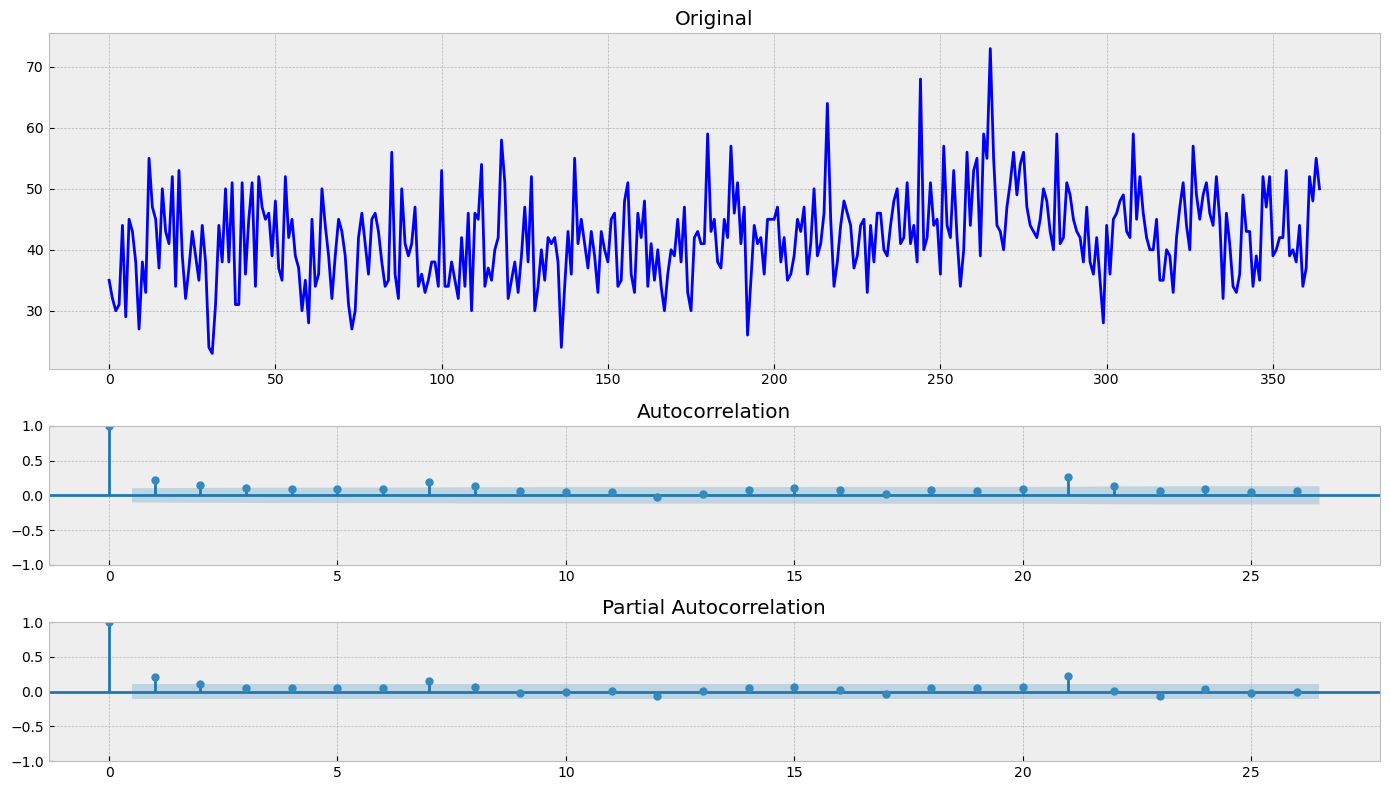

In [ ]:
tsplot(series)

Тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда.   
**Ряд "daily-total-female-births-in-cal" можно считать стационарным.**

## 2. Ряд 'international-airline-passengers'

In [ ]:
series = pd.read_csv(paths[1]).iloc[:,1]
series[:3]

0    112
1    118
2    132
Name: Count, dtype: int64

### Первичный анализ ряда

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


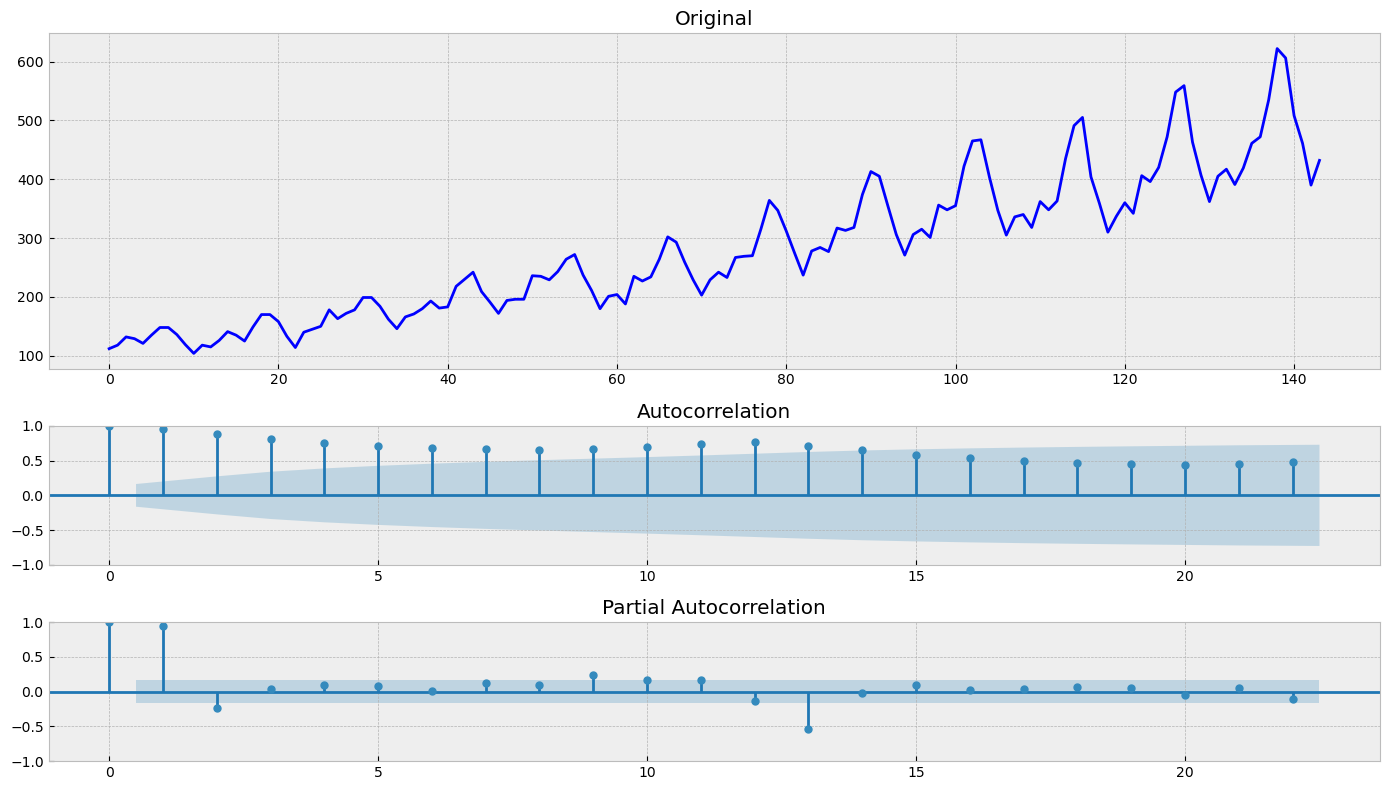

In [ ]:
tsplot(series)

Судя по результатам теста Дики-Фуллера и коррелограммам, ряд не стационарный.

### Преобразуем ряд к стационарному.

Воспользуемся преобразованием Бокса-Кокса для выравнивания дисперсии.

In [ ]:
series = boxcox(series, 0)

Results of Dickey-Fuller Test:
Test Statistic                  -2.156028
p-value                          0.222590
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


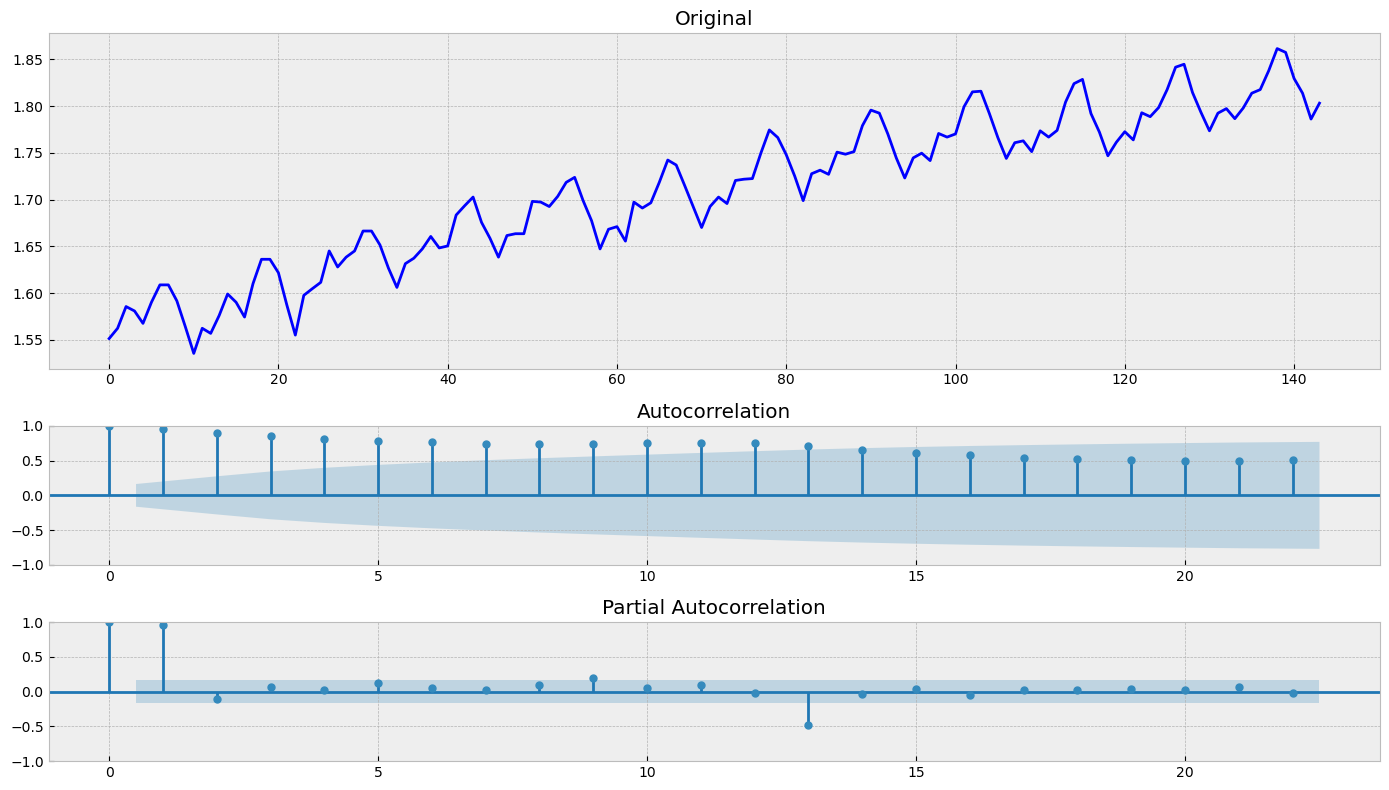

In [ ]:
tsplot(series)

Гипотезу о нестационарности ряда отвергнуть пока нельзя.   
Ряд имеет выраженные тренд, уберём его дифференцированием.

In [ ]:
series = series[1:] - series[:-1]

Results of Dickey-Fuller Test:
Test Statistic                  -2.501708
p-value                          0.115059
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


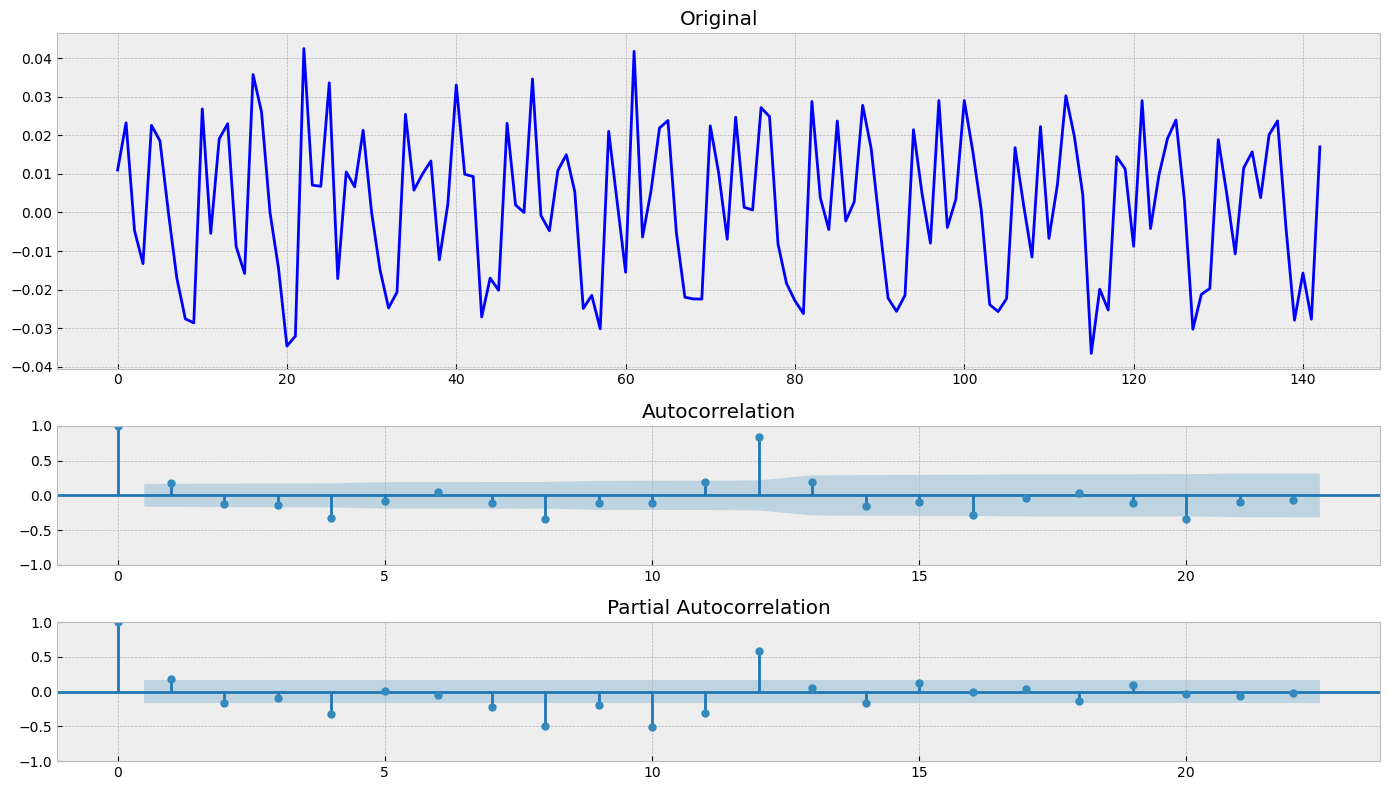

In [ ]:
tsplot(series)

Ряд ещё не стационарный.   
Коррелограммы указывают на сезонность с лагом 12. Уберём её дифференцированием.

Results of Dickey-Fuller Test:
Test Statistic                  -4.424645
p-value                          0.000268
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


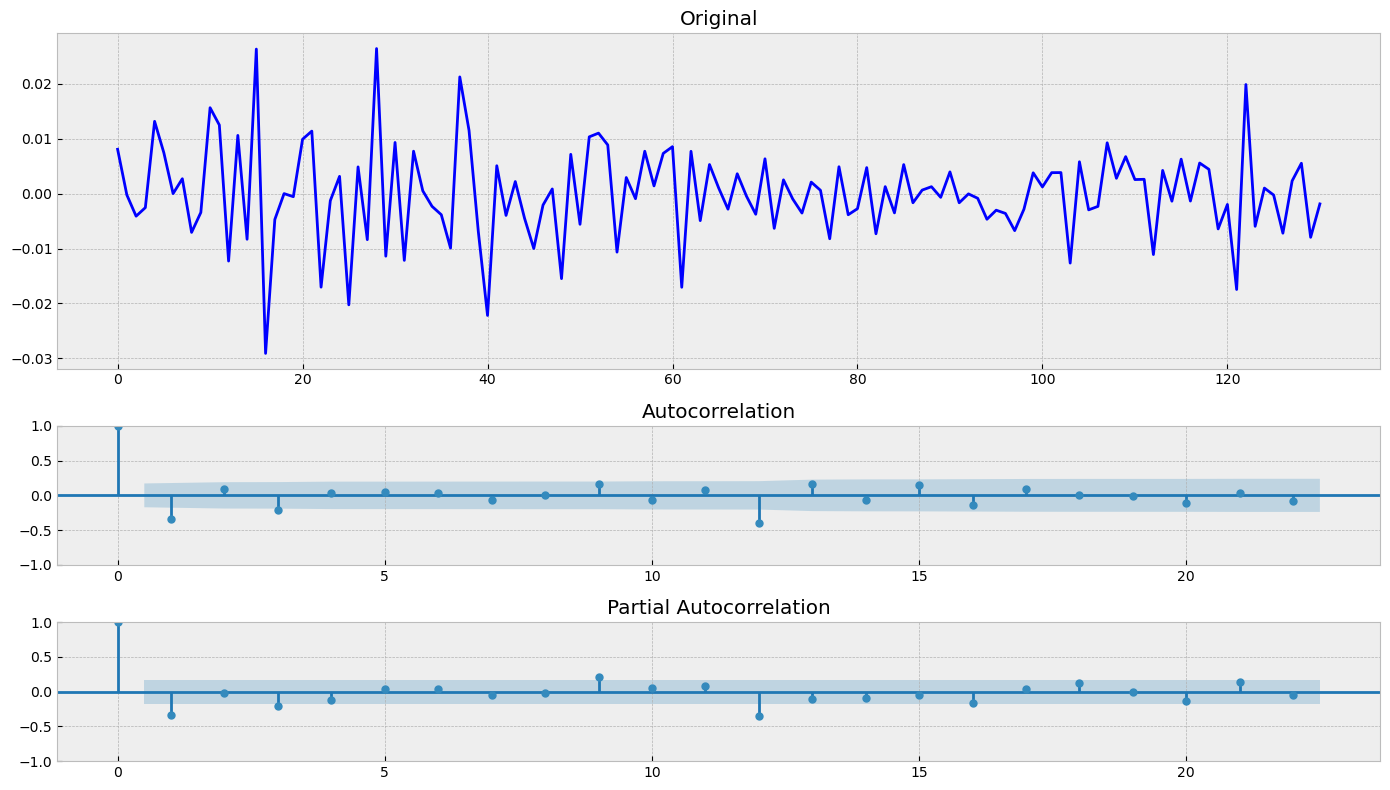

In [ ]:
series = series[12:] - series[:-12]
tsplot(series)

**Теперь ряд можно считать стационарным.**  
Тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности.

## 3. Ряд  'mean-monthly-air-temperature-deg'

In [ ]:
series = pd.read_csv(paths[2]).iloc[:,1]
series[:3]

0    40.6
1    40.8
2    44.4
Name: Deg, dtype: float64

### Первичный анализ ряда

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


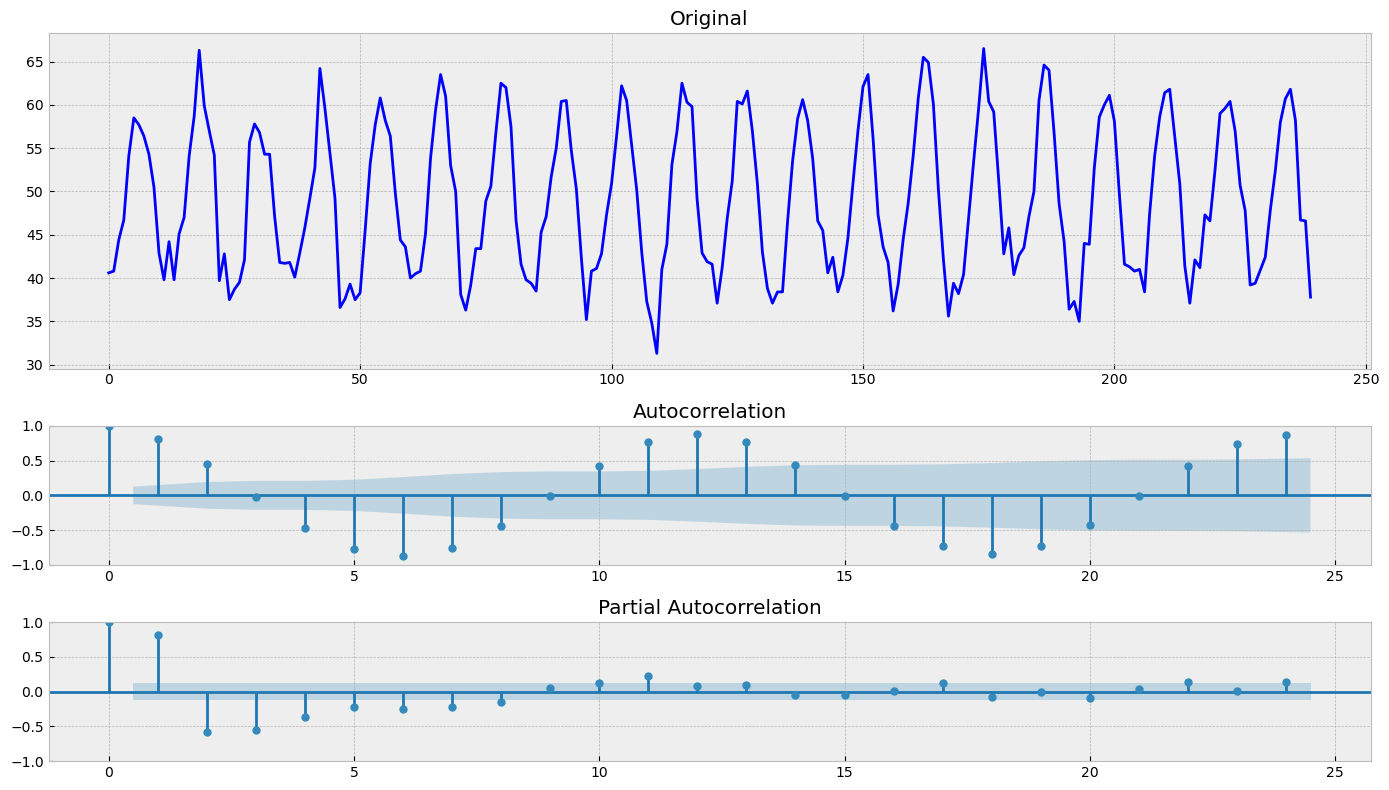

In [ ]:
tsplot(series)

Тест Дики-Фуллера и коррелограммы показывают, что отвергать гипотезу о нестационарности ряда нельзя.  
График ряда не показывает явного тренда. Есть сезонность, судя по коррелограмме.

### Преобразуем ряд к стационарному, выполняя действия, как и для ряда 2.

Results of Dickey-Fuller Test:
Test Statistic                  -3.760996
p-value                          0.003333
#Lags Used                      15.000000
Number of Observations Used    224.000000
Critical Value (1%)             -3.459885
Critical Value (5%)             -2.874531
Critical Value (10%)            -2.573694
dtype: float64


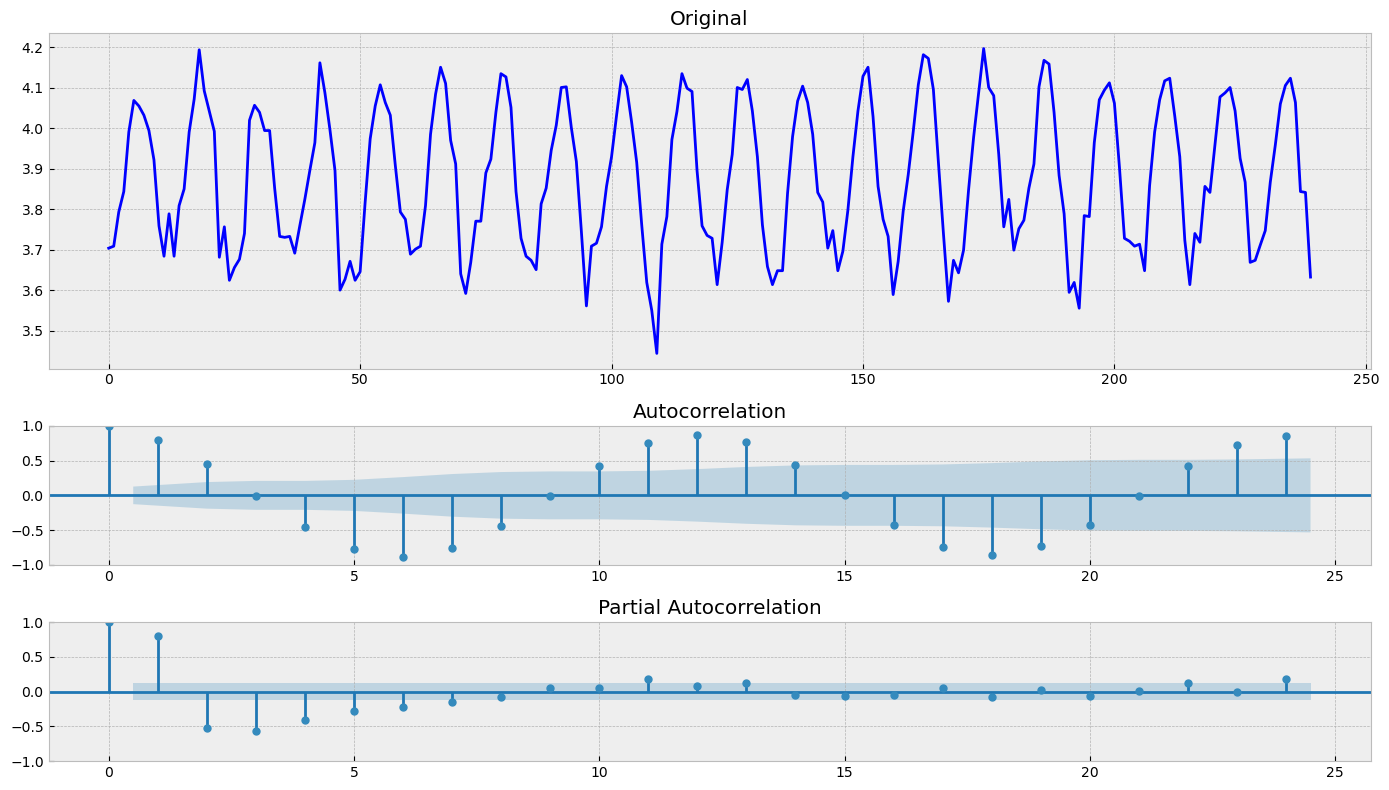

In [ ]:
# 1. Убираем разброс дисперсии
series = boxcox(series, 0)
tsplot(series)

In [ ]:
#2 Поскольку тренд не наблюдается, перехожу к исключению сезонности.

Results of Dickey-Fuller Test:
Test Statistic                -6.411725e+00
p-value                        1.883599e-08
#Lags Used                     1.200000e+01
Number of Observations Used    2.150000e+02
Critical Value (1%)           -3.461136e+00
Critical Value (5%)           -2.875079e+00
Critical Value (10%)          -2.573986e+00
dtype: float64


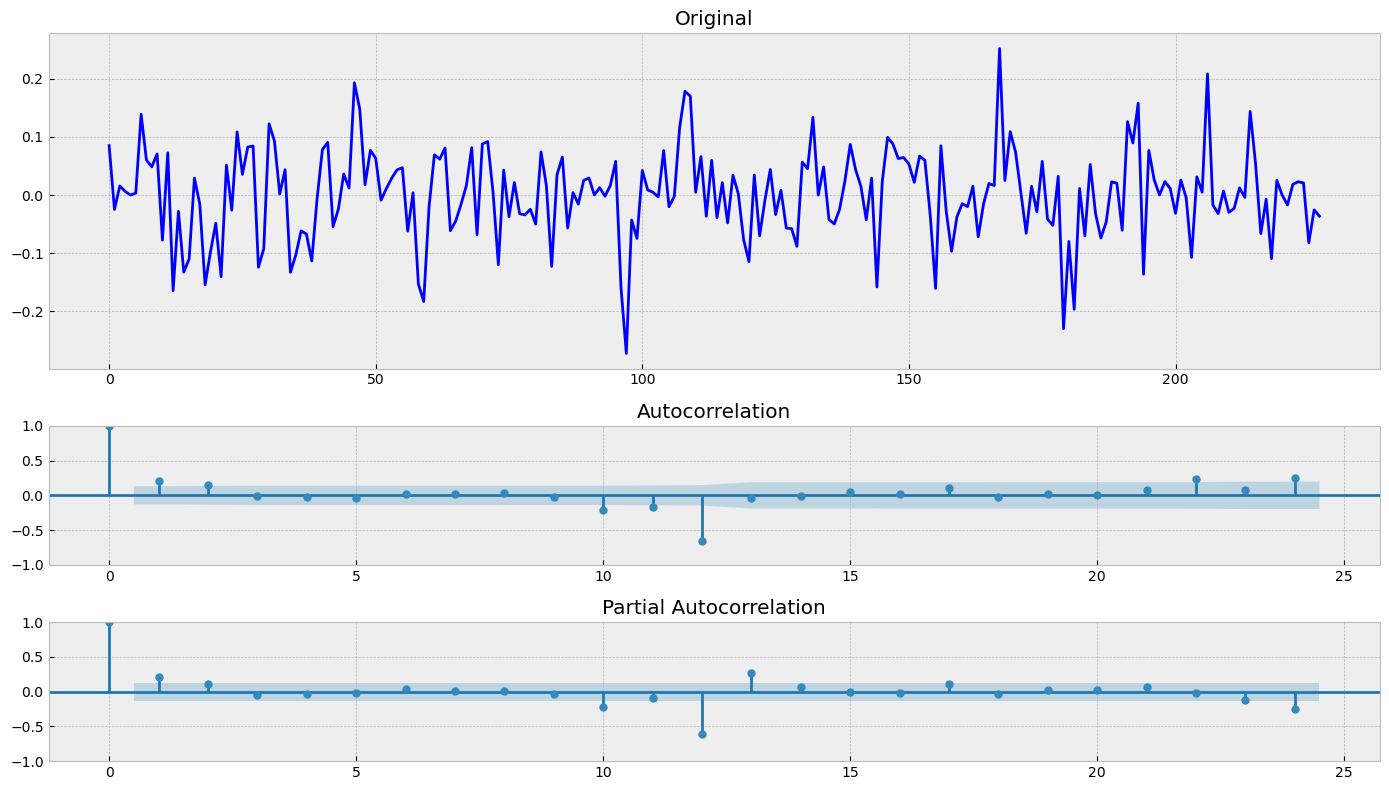

In [ ]:
#3. Убираем сезонность
series = series[12:] - series[:-12]
tsplot(series)

**Теперь ряд можно считать стационарным.**  
Тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности.

## 4. Ряд 'monthly-boston-armed-robberies-j'

In [ ]:
series = pd.read_csv(paths[3]).iloc[:,1]
series[:3]

0    41
1    39
2    50
Name: Count, dtype: int64

### Первичный анализ ряда

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


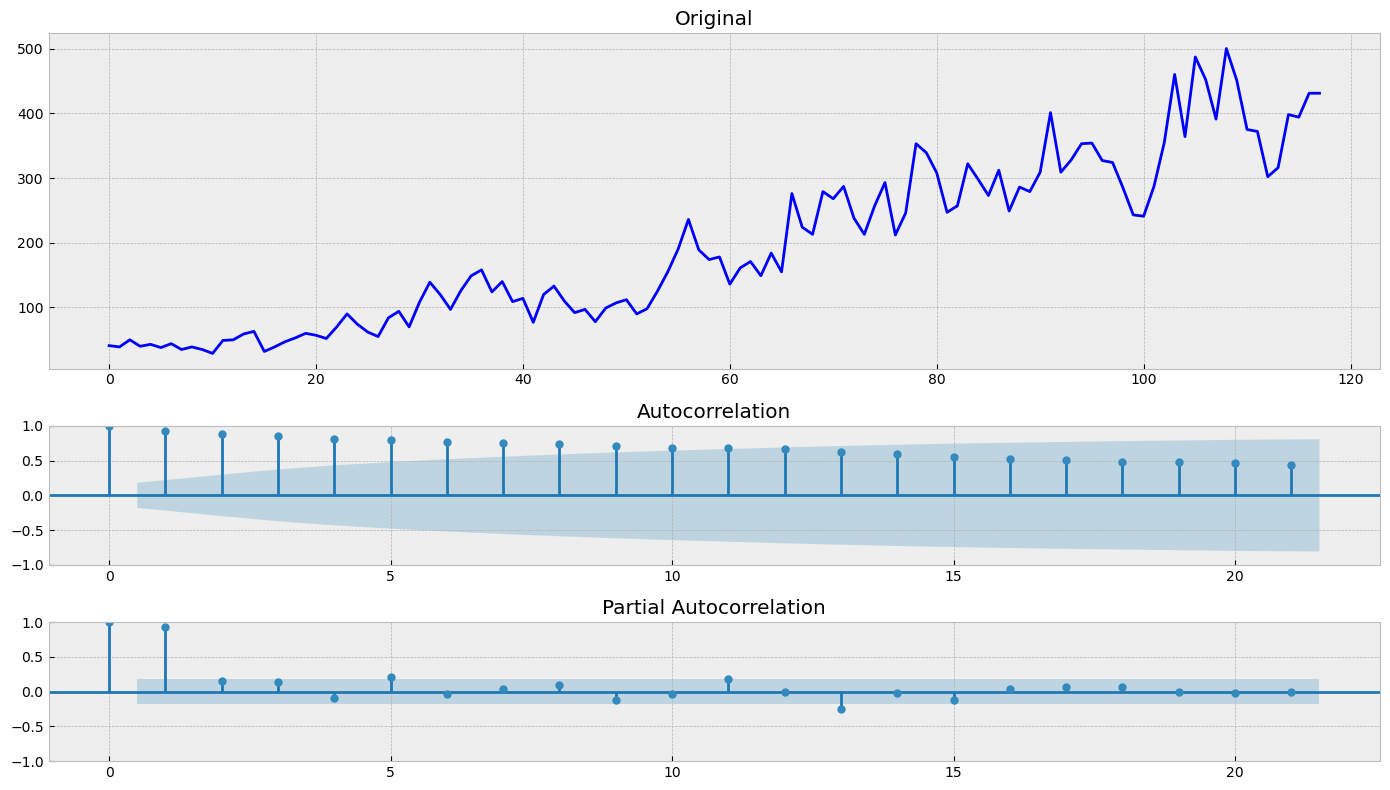

In [ ]:
tsplot(series)

Тест Дики-Фуллера и коррелограммы показывают, что отвергать гипотезу о нестационарности ряда нельзя.  
График ряда показывает тренд, но сезонность не просматривается явно, так же как и на коррелограммах.

### Преобразуем ряд к стационарному, выполняя действия, как и для ряда 2.

Results of Dickey-Fuller Test:
Test Statistic                  -2.013161
p-value                          0.280833
#Lags Used                      10.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64


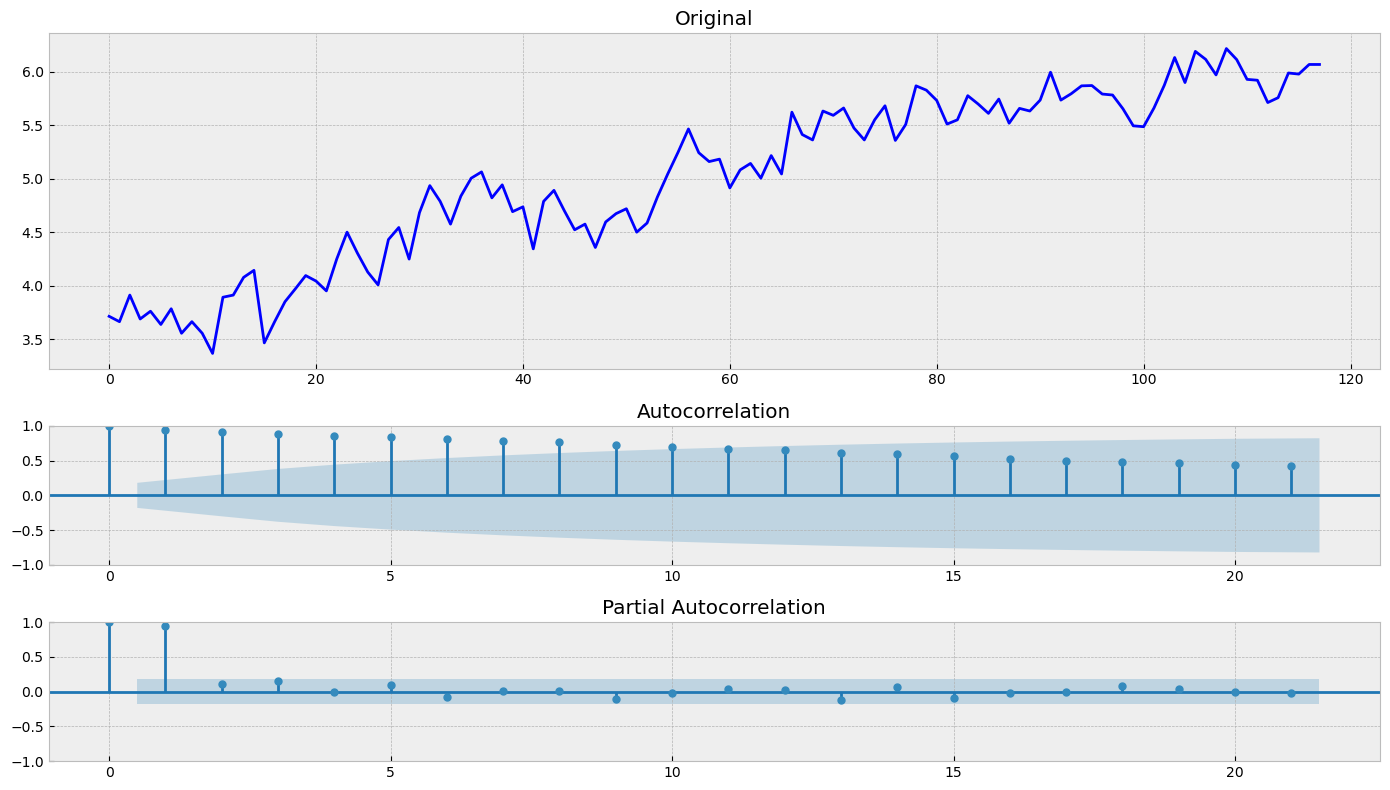

In [ ]:
# 1. Убираем разброс дисперсии
series = boxcox(series, 0)
tsplot(series)

Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64


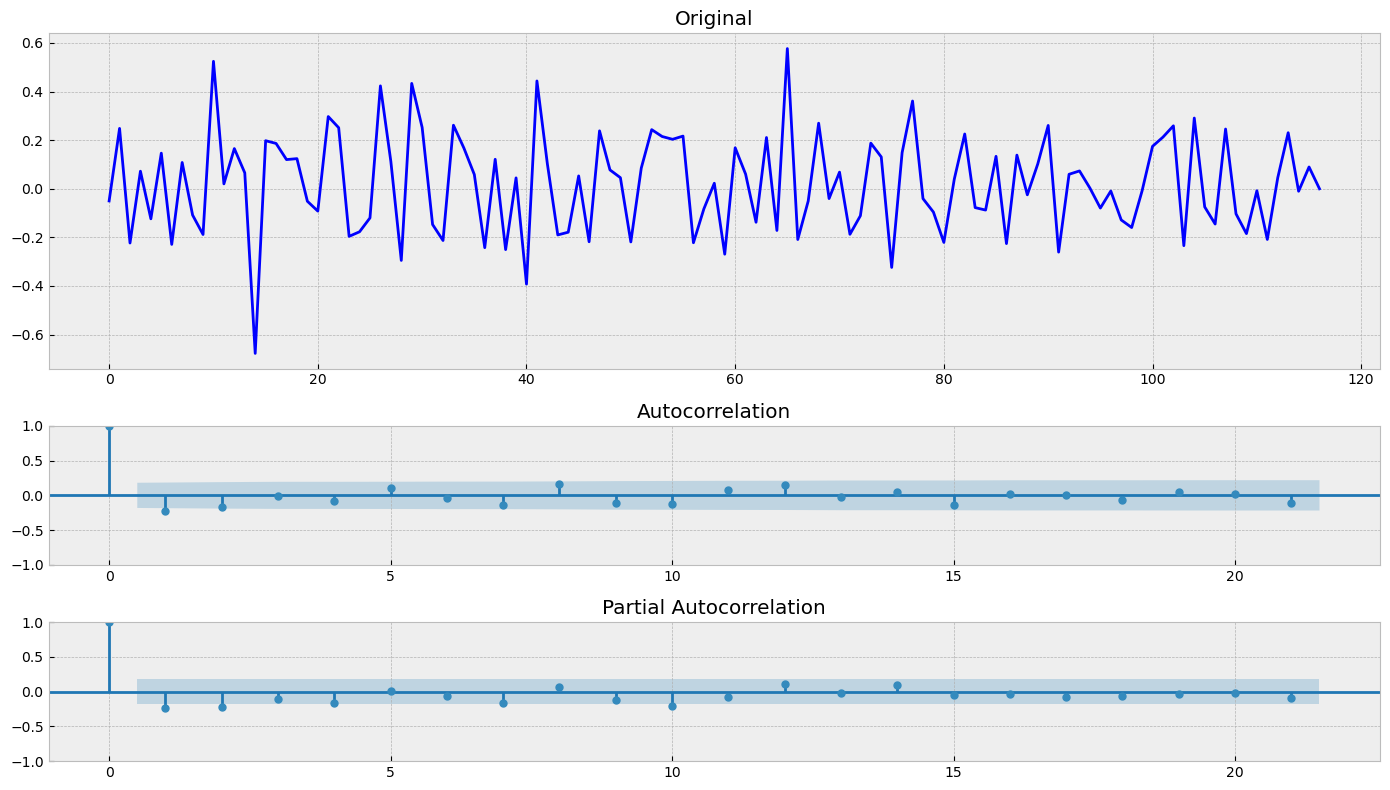

In [ ]:
# 2. Исключаем тренд
series = series[1:] - series[:-1]
tsplot(series)

**Теперь ряд можно считать стационарным.**  
Тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности.

## 5. Ряд  'monthly-sales-of-company-x-jan-6'

In [ ]:
series = pd.read_csv(paths[4]).iloc[:,1]
series[:3]

0    154
1     96
2     73
Name: Count, dtype: int64

### Первичный анализ ряда

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


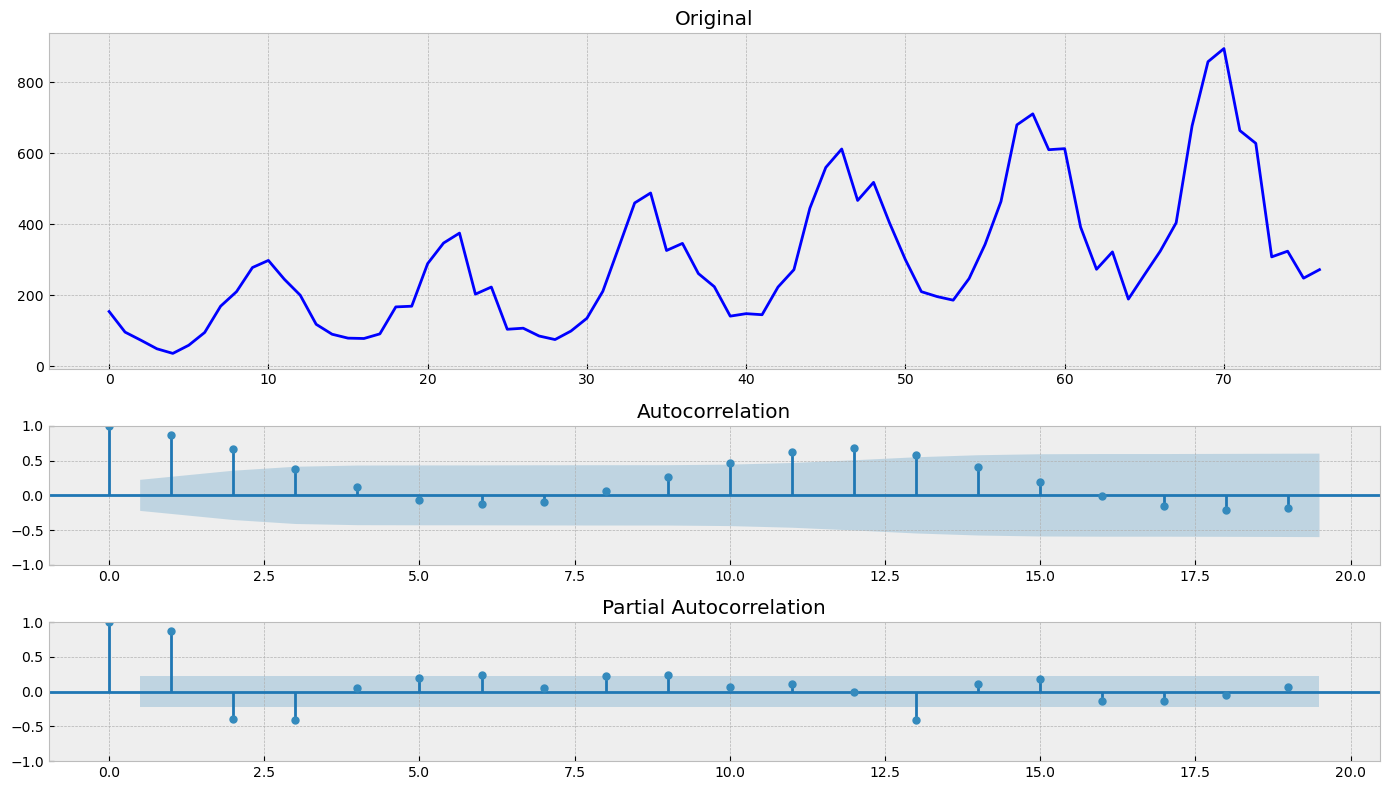

In [ ]:
tsplot(series)

Тест Дики-Фуллера и коррелограммы показывают, что отвергать гипотезу о нестационарности ряда нельзя.  
Есть существенный разброс дисперсии, вероятно, сезонность и тренд.

### Преобразуем ряд к стационарному, выполняя действия, как и для ряда 2.

Results of Dickey-Fuller Test:
Test Statistic                 -0.908049
p-value                         0.785310
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


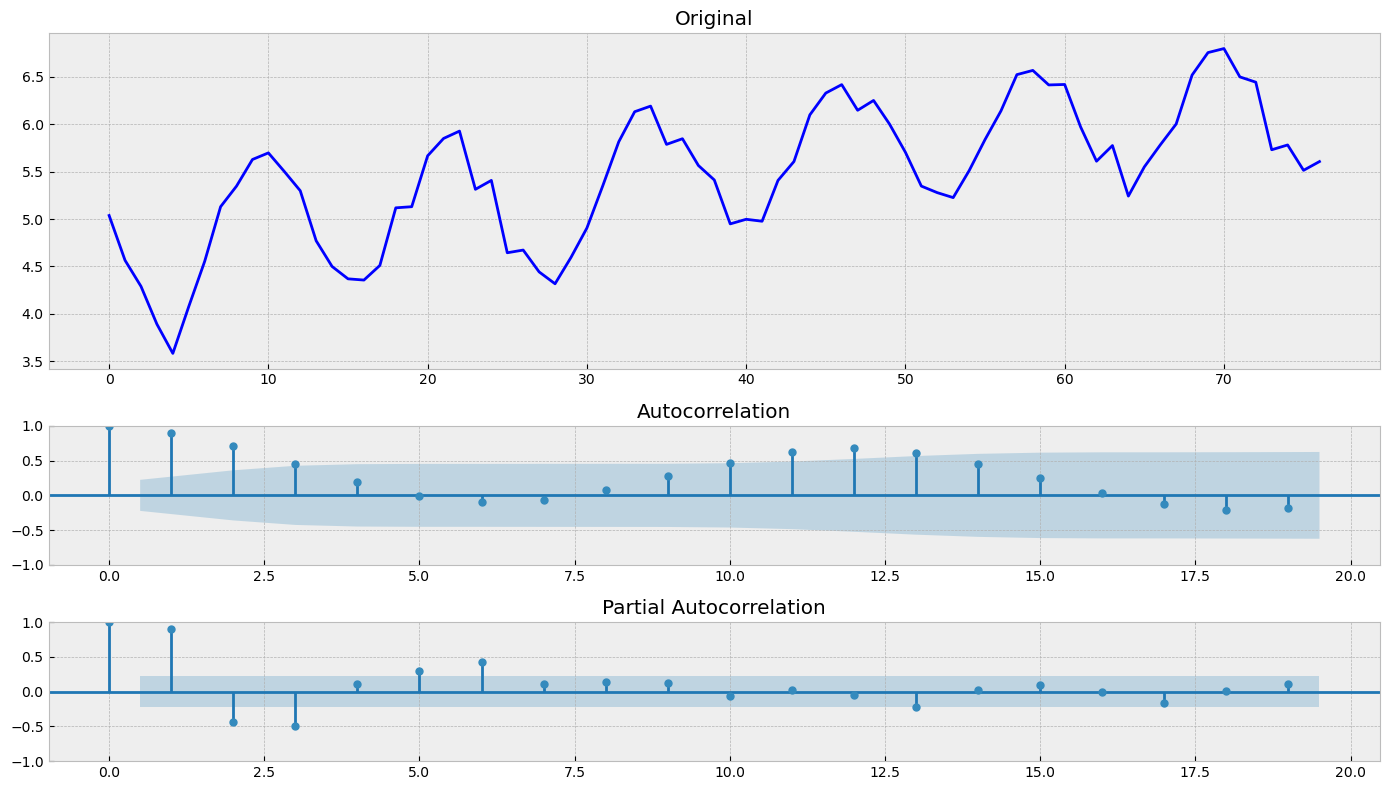

In [ ]:
# 1. Убираем разброс дисперсии
series = boxcox(series, 0)
tsplot(series)

Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


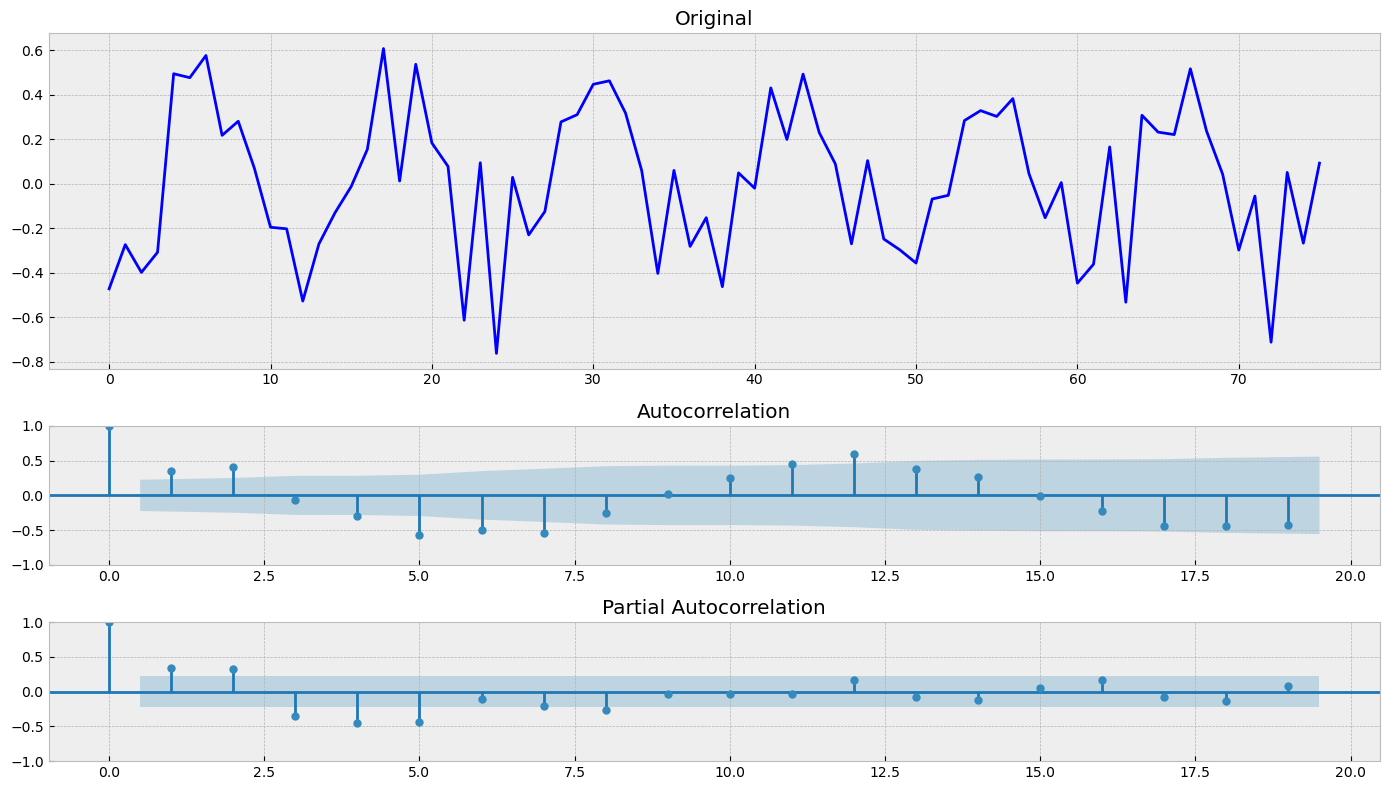

In [ ]:
# 2. Исключаем тренд
series = series[1:] - series[:-1]
tsplot(series)

Получившийся результат уже похож на стационарный ряд, но 'Test Statistic' пока ещё больше, чем 'Critical Value (1%)'.  
Уберу сезонность равную 6.

Results of Dickey-Fuller Test:
Test Statistic                -1.051523e+01
p-value                        1.000402e-18
#Lags Used                     6.000000e+00
Number of Observations Used    6.300000e+01
Critical Value (1%)           -3.538695e+00
Critical Value (5%)           -2.908645e+00
Critical Value (10%)          -2.591897e+00
dtype: float64


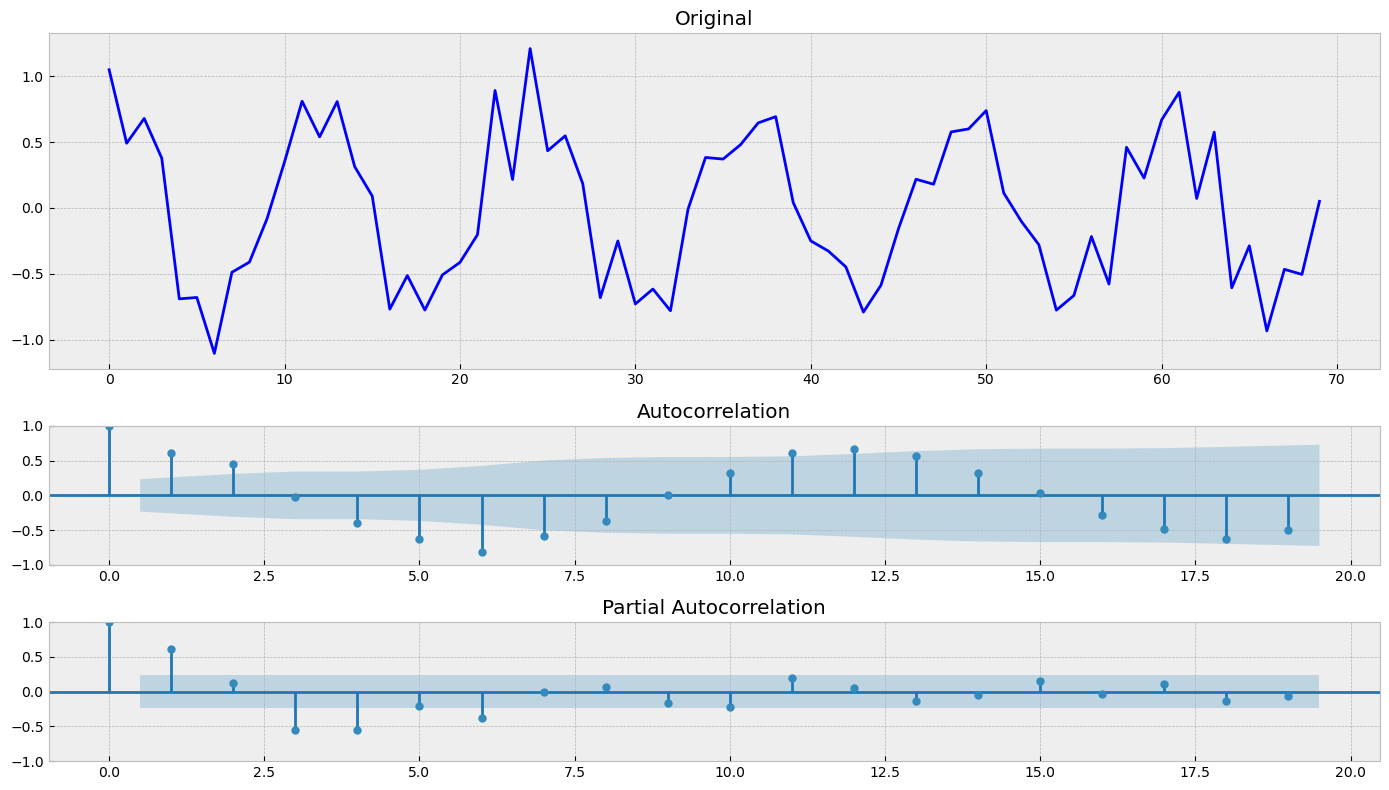

In [ ]:
#3. Убираем сезонность
series = series[6:] - series[:-6]
tsplot(series)

**Теперь ряд можно считать стационарным.**  
Тест Дики-Фуллера отвергает гипотезу о нестационарности.

## 6. Ряд 'weekly-closings-of-the-dowjones'

In [ ]:
series = pd.read_csv(paths[5]).iloc[:,1]
series[:3]

0    890.19
1    901.80
2    888.51
Name: Close, dtype: float64

### Первичный анализ ряда

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


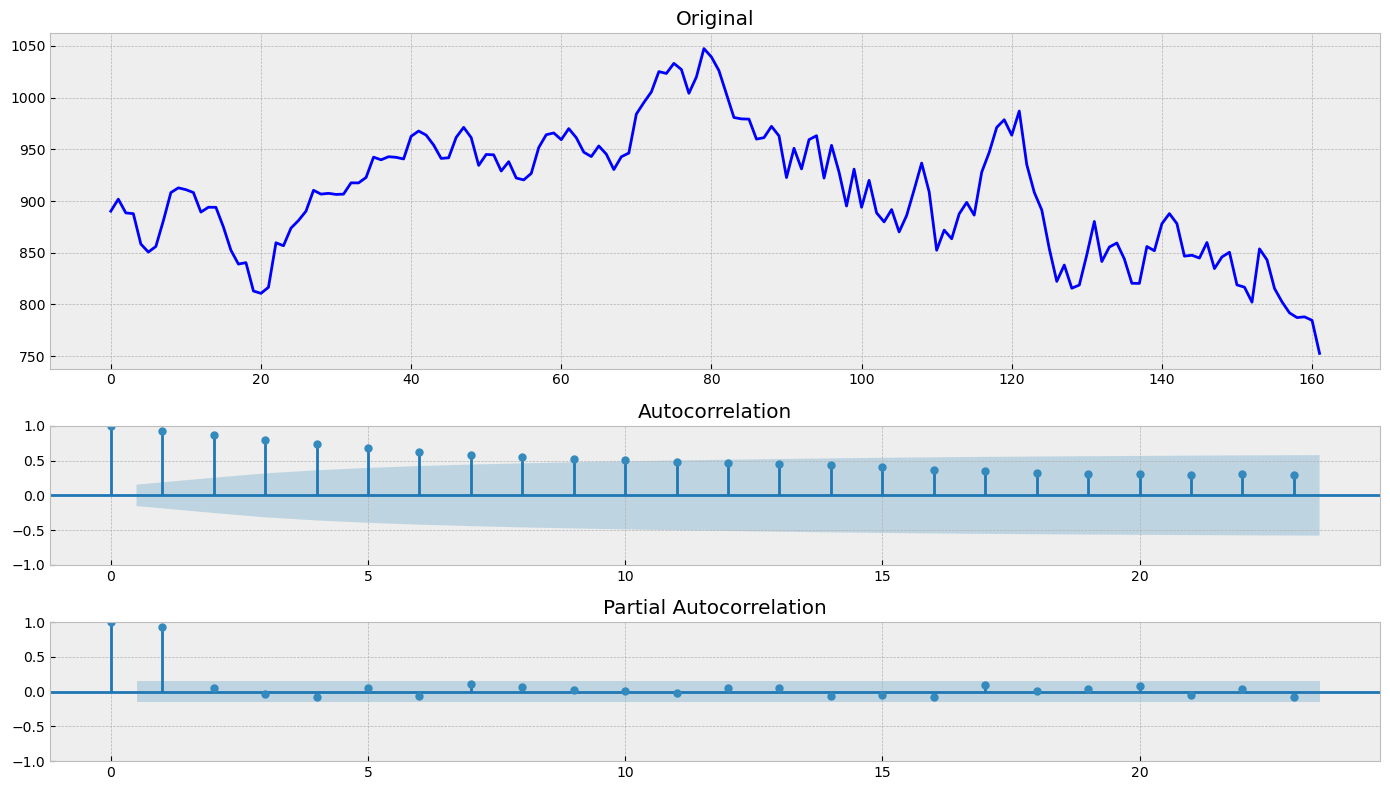

In [ ]:
tsplot(series)

Тест Дики-Фуллера и коррелограммы показывают, что отвергать гипотезу о нестационарности ряда нельзя.  
График ряда показывает разнонаправленные тренды, но сезонность не просматривается явно, так же как и на коррелограммах.

### Преобразуем ряд к стационарному, выполняя действия, как и для ряда 2.

Results of Dickey-Fuller Test:
Test Statistic                  -1.210369
p-value                          0.669119
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


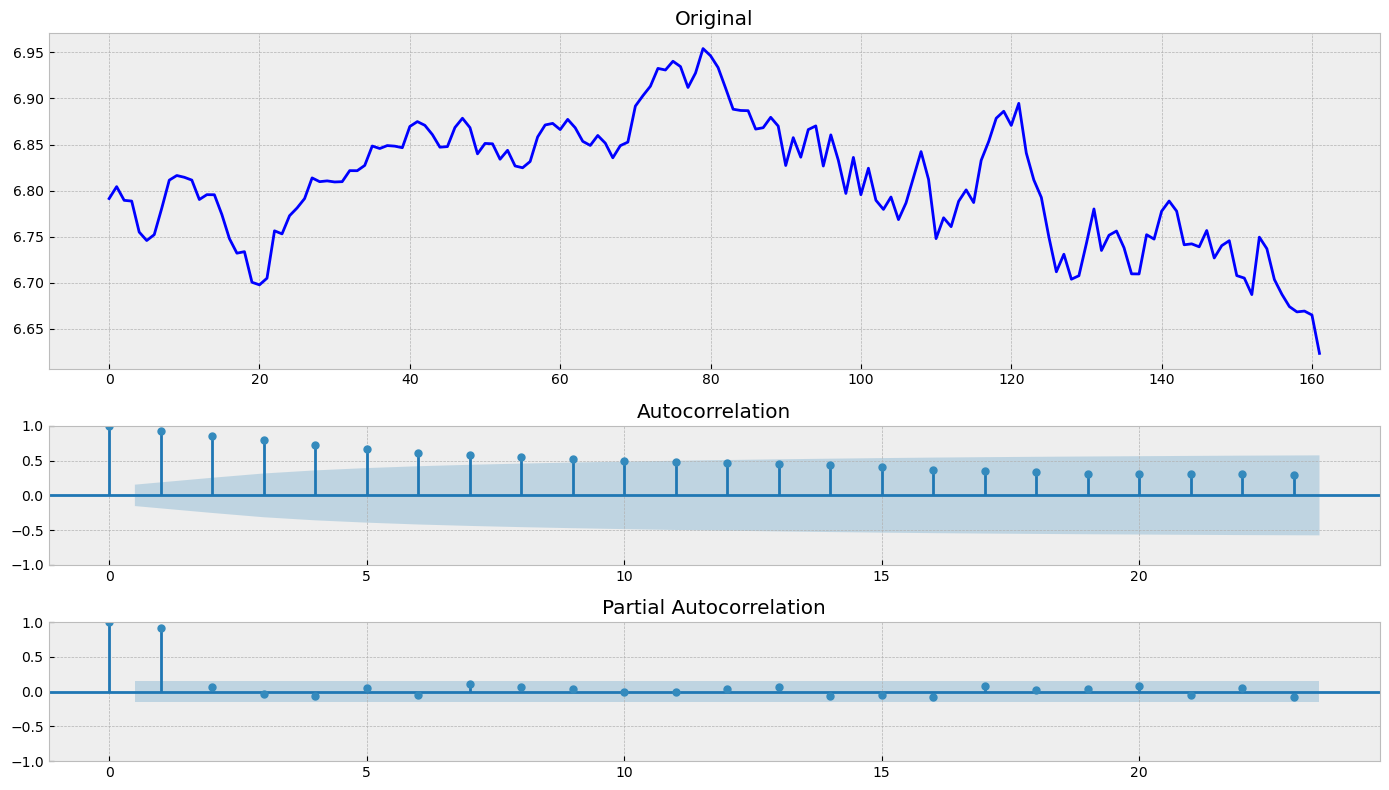

In [ ]:
# 1. Убираем разброс дисперсии
series = boxcox(series, 0)
tsplot(series)

Results of Dickey-Fuller Test:
Test Statistic                -1.299582e+01
p-value                        2.751609e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


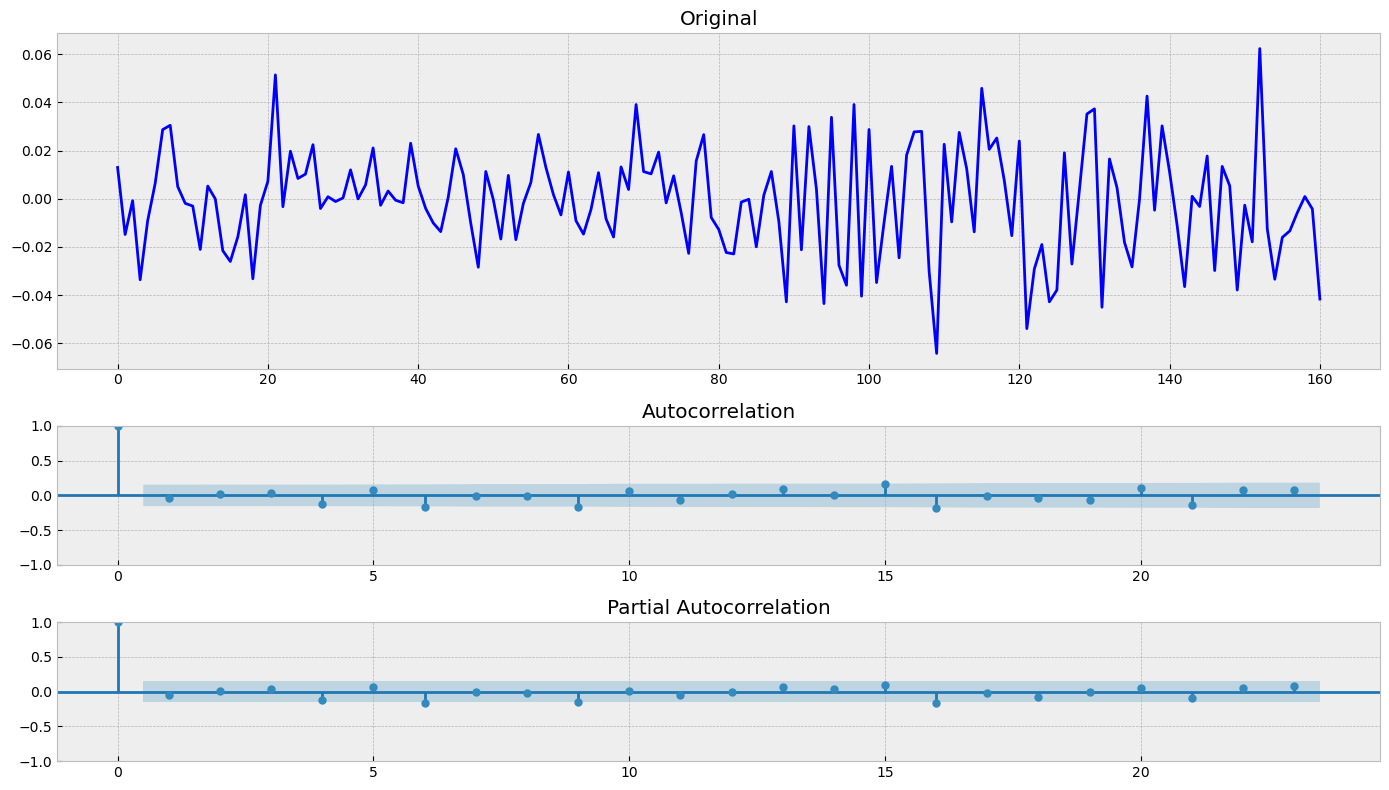

In [ ]:
# 2. Исключаем тренд
series = series[1:] - series[:-1]
tsplot(series)

**Теперь ряд можно считать стационарным.**  
Тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности.